# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
print ('Beginning Data Retrieval')
print ('-----------------------------')

# Create empty lists of our variables
cityList = []
cloudinessList = []
countryList = [] 
dateList = []
humidityList = []
latList = [] 
lngList = [] 
maxTempList = [] 
windSpeedList = []
indexCounter = 0
setCounter = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For loop through the cities list, for each city in city list 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cityList.append(response["name"])
        cloudinessList.append(response['clouds']['all'])
        countryList.append(response["sys"]["country"])
        dateList.append(response["dt"])
        humidityList.append(response["main"]["humidity"])
        latList.append(response["coord"]["lat"])
        lngList.append(response["coord"]["lon"])
        maxTempList.append(response['main']['temp_max'])
        windSpeedList.append(response["wind"]["speed"])
        if indexCounter > 49:
            indexCounter = 0
            setCounter += 1
    
        else:
            indexCounter += 1
            
        print(f"Processing Record {indexCounter} of Set {setCounter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | half moon bay
Processing Record 5 of Set 1 | montefiascone
Processing Record 6 of Set 1 | egvekinot
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | ust-omchug
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | saint george
City not found. Skipping...
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | yuci
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | gbarnga
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 |

Processing Record 36 of Set 4 | ismailia
Processing Record 37 of Set 4 | geraldton
Processing Record 38 of Set 4 | moron
Processing Record 39 of Set 4 | panzhihua
City not found. Skipping...
Processing Record 40 of Set 4 | luoyang
Processing Record 41 of Set 4 | retalhuleu
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | zhezkazgan
Processing Record 44 of Set 4 | esperance
City not found. Skipping...
Processing Record 45 of Set 4 | ravar
Processing Record 46 of Set 4 | yatou
Processing Record 47 of Set 4 | buala
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | barra dos coqueiros
Processing Record 50 of Set 4 | pinotepa nacional
Processing Record 0 of Set 5 | the valley
City not found. Skipping...
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | baherden
Processing Record 3 of Set 5 | jinxiang
City not found. Skipping...
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | lagoa
Processing Record 6 of Se

Processing Record 21 of Set 8 | porto seguro
Processing Record 22 of Set 8 | salalah
Processing Record 23 of Set 8 | troitsk
Processing Record 24 of Set 8 | la paz
City not found. Skipping...
Processing Record 25 of Set 8 | auki
Processing Record 26 of Set 8 | pangnirtung
Processing Record 27 of Set 8 | gongzhuling
Processing Record 28 of Set 8 | nador
Processing Record 29 of Set 8 | mikkeli
City not found. Skipping...
Processing Record 30 of Set 8 | jalu
Processing Record 31 of Set 8 | phonhong
Processing Record 32 of Set 8 | kirksville
Processing Record 33 of Set 8 | tigzirt
Processing Record 34 of Set 8 | yerbogachen
City not found. Skipping...
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | tzucacab
Processing Record 37 of Set 8 | jauja
Processing Record 38 of Set 8 | novoagansk
City not found. Skipping...
City not found. Skipping...
Processing Record 39 of Set 8 | mehamn
Processing Record 40 of Set 8 | solenzo
Processing Record 41 of Set 8 | husavik
Proces

Processing Record 0 of Set 12 | padilla
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Creating panda dataframe 

cityWeather_df = pd.DataFrame({"City" :cityList,
                            "Latitude" : latList,
                            "Longitude" : lngList,
                            "Max Temperature" : maxTempList,
                            "Humidity" : humidityList,
                            "Cloudiness" : cloudinessList,
                            "Wind Speed" : windSpeedList,
                            "Country" : countryList,
                            "Date" : dateList
})

# Export to CSV 
cityWeather_df.to_csv("cityWeatherOutput.csv", index = False)

# Display to dataframe 
cityWeather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,80.56,57,0,11.50,BR,1629725590
1,Rikitea,-23.1203,-134.9692,69.30,62,28,19.64,PF,1629725501
2,Tasiilaq,65.6145,-37.6368,42.96,85,41,2.62,GL,1629725589
3,Half Moon Bay,37.4636,-122.4286,59.79,88,90,1.99,US,1629725711
4,Montefiascone,42.5393,12.0362,86.45,61,75,8.99,IT,1629725711


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

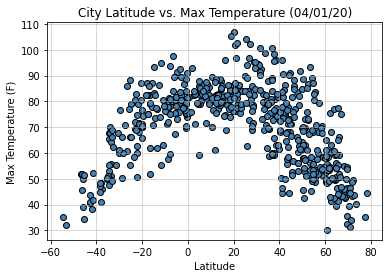

In [15]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Max Temperature'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Max Temperature (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Max Temperature (F)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsTemp.png")

## Latitude vs. Humidity Plot

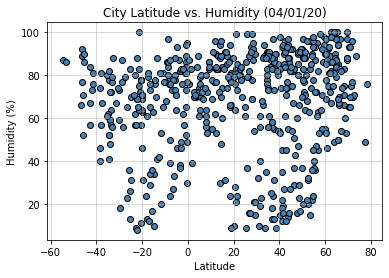

In [16]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Humidity'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Humidity (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Humidity (%)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsHumidity.png")

## Latitude vs. Cloudiness Plot

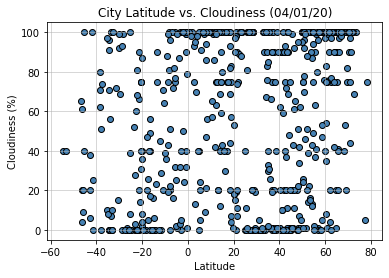

In [17]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Cloudiness'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Cloudiness (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Cloudiness (%)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsCloudiness.png")

## Latitude vs. Wind Speed Plot

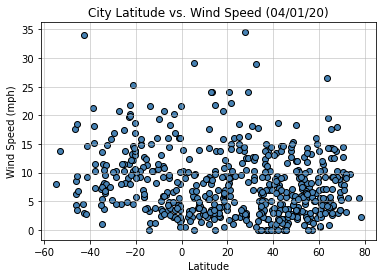

In [18]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Wind Speed'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Wind Speed (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Wind Speed (mph)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsWindSpeed.png")

## Linear Regression

In [24]:
# 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


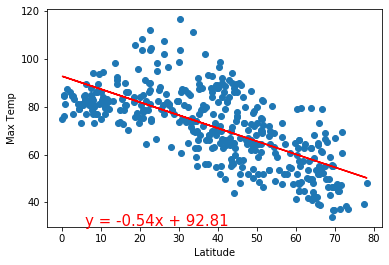

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


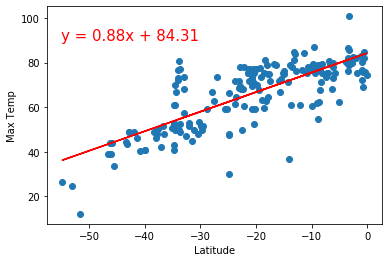

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


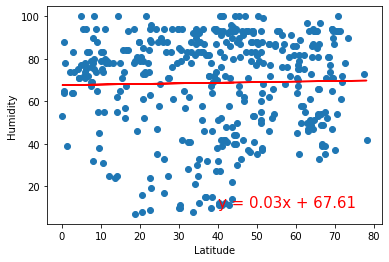

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


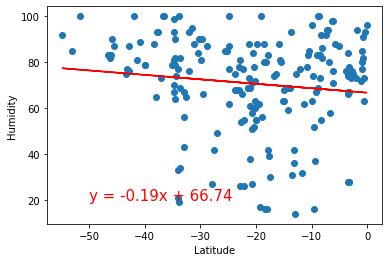

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


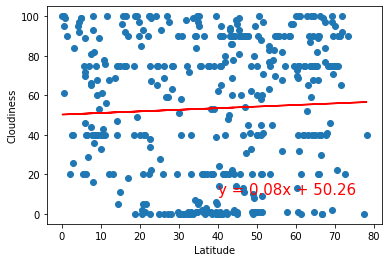

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


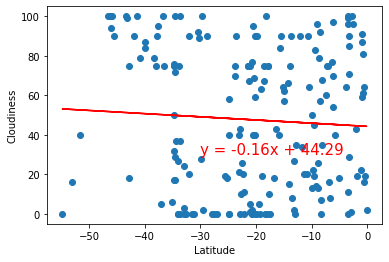

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


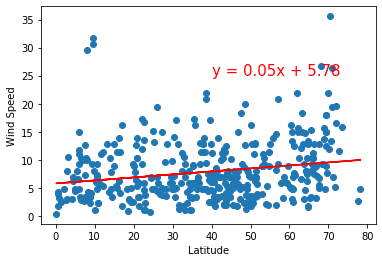

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


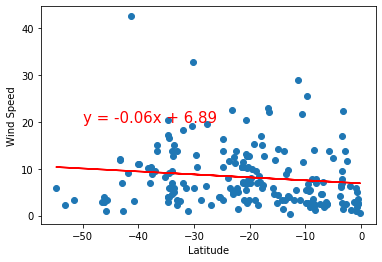